In [1]:
#%matplotlib notebook

https://kapernikov.com/ipywidgets-with-matplotlib/

In [1]:
from ipywidgets import widgets
import numpy as np
import matplotlib.pyplot as plt

## Exponentiated quadratic (RBF) Kernel

In [2]:
def compute_gram(l = 4,s = 1):
    """
    l is a parameter that regulates how fast neighbouring 
    points will become uncorrelated (smaller l, faster they become uncorrelated)
    we can add an scaling factor s to regulate between which values it will vary 
    """
    k = lambda x, xp : s * np.exp(-((x-xp)**2)/(2*(l**2)))
    k = np.vectorize(k)
    
    N=20
    x = np.linspace(0, 1, N)
    G = k(np.tile(np.arange(N),(N,1)),np.tile(np.arange(N),(N,1)).transpose())
    return G

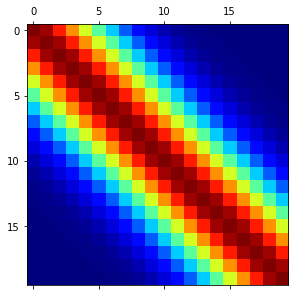

In [3]:
output = widgets.Output()
 
with output:
    fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
    
ker = ax.matshow(compute_gram(l = 4,s = 1),cmap=plt.cm.jet)

In [4]:
# create some control elements
length_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='length',continuous_update=False)
sigma_slider = widgets.FloatSlider(value=1, min=0, max=10, step=0.1, description='sigma',continuous_update=False)
kernel_dropdown  = widgets.Dropdown(options=['1', 'exp_q', '3'],value='exp_q', description='Kernel:', disabled=False)

# callback functions
@output.capture(clear_output=True)
def update_length(length):
    G = compute_gram(l = length.new,s = sigma_slider.value)
    #ax = plt.gca()
    ax.matshow(G,cmap=plt.cm.jet)
    display(fig)

@output.capture(clear_output=True)
def update_sigma(sigma):
    G = compute_gram(l = length_slider.value,s = sigma.new)
    ax.matshow(G,cmap=plt.cm.jet)
    display(fig)
    
@output.capture(clear_output=True)
def update_kernel(new_kernel):
    G = compute_gram(l = 4,s = 2)
    fig.matshow(G,cmap=plt.cm.jet)
    display(fig)

# connect callbacks and traits
length_slider.observe(update_length, 'value')
sigma_slider.observe(update_sigma, 'value')
kernel_dropdown.observe(update_kernel, 'value')

In [5]:
controls = widgets.VBox([length_slider, sigma_slider, kernel_dropdown])
widgets.HBox([controls, output])

# Kernel Demo

In [6]:
def rbk_kernel(l = 4,s = 1):
    """
    l is a parameter that regulates how fast neighbouring 
    points will become uncorrelated (smaller l, faster they become uncorrelated)
    we can add an scaling factor s to regulate between which values it will vary 
    """
    k = lambda x, xp : s * np.exp(-((x-xp)**2)/(2*(l**2)))
    k = np.vectorize(k)
    return k

def compute_gram(kernel,N=20):  
    x = np.linspace(0, 1, N)
    G = kernel(np.tile(np.arange(N),(N,1)),np.tile(np.arange(N),(N,1)).transpose())
    return G

In [7]:
%%capture
a = widgets.FloatLogSlider(value=0,min=-4,max=2,continuous_update=False,description=r'length scale \( \mathcal{l} \)')
b = widgets.FloatSlider(value=1,max=4,continuous_update=False,description='scale \( \sigma \)',style={'description_width': 'initial'})
c = widgets.IntSlider(value=20,min=1,max=20,continuous_update=False,description='matrix size N')

fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
fig2, ax2 = plt.subplots(constrained_layout=True, figsize=(6, 4))

def plot_gram(a, b, c):
    G = compute_gram(kernel=rbk_kernel(l = a,s = b),N=c)    
    ms = ax.matshow(G,cmap=plt.cm.jet,vmin=0,vmax=10)
    ax.set_title("Gram Matrix")
    cbar = fig.colorbar(ms)
    #cbar_ticks = cbar.get_ticks()
    display(fig)
    cbar.set_ticks([])
    #print(cbar_ticks)

def plot_kernel(a,b):
    x = np.linspace(-100, 100, 1000)
    kernel = rbk_kernel(l = a,s = b)
    y = kernel(x,0)
    ax2.plot(x,y)
    ax2.set_title("Kernel shape")
    ax2.set_ylim([0,3])
    display(fig2)
    ax2.clear()

out1 = widgets.interactive_output(plot_gram, {'a': a, 'b': b, 'c': c})
out2 = widgets.interactive_output(plot_kernel, {'a': a, 'b': b})

box_layout = widgets.Layout(align_items='center') # other options display='flex',flex_flow='column',width='50%'

ui = widgets.HBox([a, b, c],layout=box_layout)
o = widgets.HBox([out1,out2],layout=box_layout)

app = widgets.VBox([ui,o],layout=box_layout)

In [8]:
display(app)